In [1]:
#importing pandas

import pandas as pd

In [2]:
#reading the data file 

file=pd.read_csv("titanic.csv")

In [3]:
#first few rows of titanic dataset

file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
file.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Continuous - Continuous Bivariate Analysis

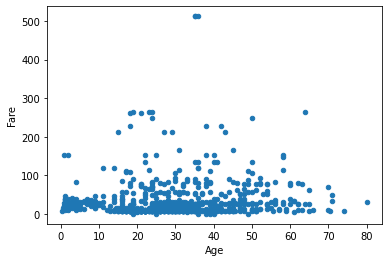

In [6]:
file.plot.scatter('Age','Fare')

In [7]:
file.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


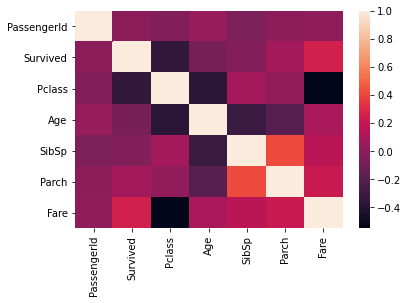

In [8]:
import seaborn as sns

sns.heatmap(file.corr())

In [9]:
file['Age'].corr(file['Fare'])

0.0960666917690389

# Categorical - Continuous Bivariate Analysis

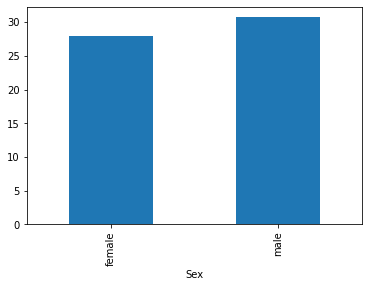

In [10]:
file.groupby('Sex')['Age'].mean().plot.bar()

In [11]:
#importing the scipy library for ttest

from scipy.stats import ttest_ind

In [12]:
male = file[file['Sex']=='male']

In [13]:
female = file[file['Sex']=='female']

In [14]:
# two independent variable t-test
# check if means are significantly different or not

t_test, p_value = ttest_ind(male['Age'], female['Age'], nan_policy='omit')

In [15]:
print(p_value < 0.05)

True


Since p-value is less than 0.05, can reject null hypothesis and say there is a significant differences in the means of female and male passengers.

# Categorical - Categorical Bivariate Analysis

In [16]:
cont = pd.crosstab(file['Sex'], file['Survived'])
cont

Survived,0,1
Sex,,
female,81,233
male,468,109


In [17]:
from scipy.stats import chi2_contingency

In [18]:
chi2, p_value, dof, expected = chi2_contingency(cont)

In [19]:
expected

array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]])

In [20]:
print("Expected female survival rate is {0:.2f}".format((expected[0][1]/(expected[0][0]+expected[0][1]))*100))
print("Expected male survival rate is {0:.2f}".format((expected[1][1]/(expected[1][0]+expected[1][1]))*100))

Expected female survival rate is 38.38
Expected male survival rate is 38.38


In [21]:
print("Observed female survival rate is {0:.2f}".format((cont.iloc[0,1]/(cont.iloc[0,0]+cont.iloc[0,1]))*100))
print("Observed male survival rate is {0:.2f}".format((cont.iloc[1,1]/(cont.iloc[1,0]+cont.iloc[1,1]))*100))

Observed female survival rate is 74.20
Observed male survival rate is 18.89


In [22]:
print(p_value < 0.05)

True


Since p-value is less than 0.05, can reject null hypothesis and say there is a significant differences in the observed value and the expected value. This means females are more likely to survive